# predictig cancer_KNN(classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\tala\\mashin learning\\gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

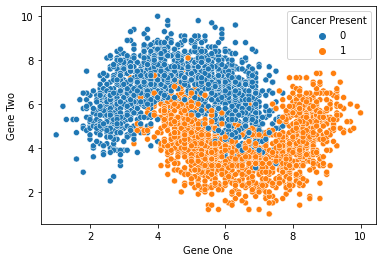

In [5]:
sns.scatterplot(data=df , x="Gene One",y="Gene Two" , hue="Cancer Present")

<AxesSubplot:xlabel='Gene One', ylabel='Density'>

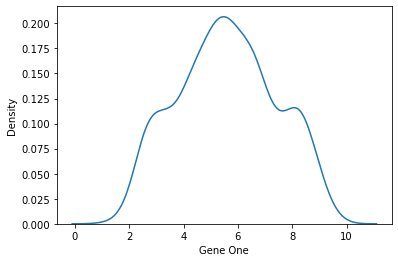

In [6]:
sns.kdeplot(df["Gene One"])

<AxesSubplot:xlabel='Gene Two', ylabel='Density'>

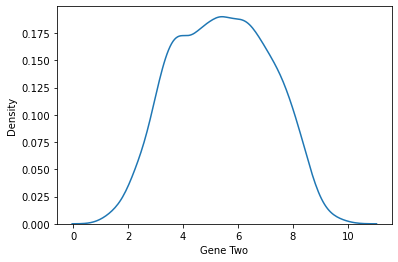

In [8]:
sns.kdeplot(df["Gene Two"])

In [9]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

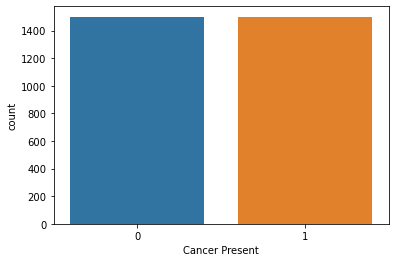

In [10]:
sns.countplot(df["Cancer Present"])

<AxesSubplot:>

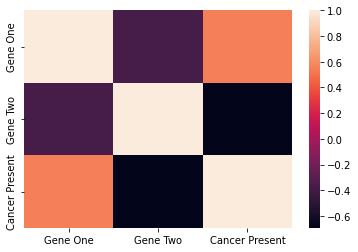

In [12]:
sns.heatmap(df.corr())

In [13]:
inputs=df.drop("Cancer Present", axis=1)
target=df["Cancer Present"]

In [14]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 , random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [16]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=1)

knn_model.fit(x_train_scaled , y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred=knn_model.predict(x_test_scaled)

In [22]:
from sklearn.metrics import confusion_matrix ,classification_report

In [23]:
confusion_matrix(y_test , y_pred)

array([[299,  29],
       [ 27, 245]], dtype=int64)

In [24]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.91       328\n           1       0.89      0.90      0.90       272\n\n    accuracy                           0.91       600\n   macro avg       0.91      0.91      0.91       600\nweighted avg       0.91      0.91      0.91       600\n'

In [26]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       328
           1       0.89      0.90      0.90       272

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9066666666666666

In [28]:
error=1-accuracy_score(y_test,y_pred)

In [29]:
error

0.09333333333333338

# elbow method

In [32]:
test_error=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled , y_train)
    
    y_pred=knn_model.predict(x_test_scaled)
    
    error=1-accuracy_score(y_test,y_pred)
    
    test_error.append(error)

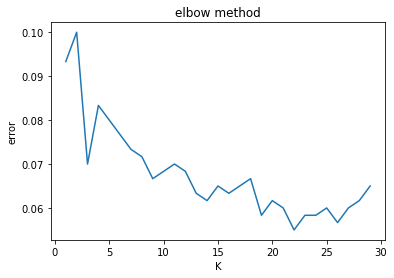

In [34]:
plt.plot(range(1,30) ,test_error )
plt.xlabel("K")
plt.ylabel("error")

plt.title("elbow method")

plt.show()

# grid search cv

In [35]:
scaler=StandardScaler()
knn=KNeighborsClassifier()

In [36]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [37]:
operations=[("scaler", scaler),("knn",knn)]

from sklearn.pipeline import Pipeline

pipe=Pipeline(operations)

In [38]:
from sklearn.model_selection import GridSearchCV

k_values=list(range(1,30))
param_grid={"knn__n_neighbors":k_values}

In [39]:
cv_classifier=GridSearchCV(pipe , param_grid , cv=5 , scoring="accuracy")
cv_classifier.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [40]:
cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20))])>

In [41]:
full_pred=cv_classifier.predict(x_test)

In [43]:
print(classification_report(y_test , full_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       328
           1       0.94      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [44]:
confusion_matrix(y_test,full_pred)

array([[311,  17],
       [ 20, 252]], dtype=int64)

In [45]:
accuracy_score(y_test,full_pred)

0.9383333333333334

# if k=5

In [52]:
knn_model_2=KNeighborsClassifier(n_neighbors=5)

knn_model_2.fit(x_train_scaled , y_train)
y_pred_5=knn_model_2.predict(x_test_scaled)

# sample for prediction

In [50]:
#probability
sample=[[3.8 ,6.9]]
knn_model.predict_proba(sample)

array([[0.82758621, 0.17241379]])

In [51]:
#logistic answer
knn_model.predict(sample)

array([0], dtype=int64)

In [54]:
knn_model_2.predict_proba(sample)

array([[1., 0.]])

In [55]:
knn_model_2.predict(sample)

array([0], dtype=int64)